In [ ]:
!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud

import numpy as np
import pandas as pd
import re

import konlpy

import plotly.express as px
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 38.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 데이터 불러오기 및 확인
df = pd.read_csv('/content/drive/MyDrive/KDT /17년도_철도사고_전처리.csv')
df

,지역번호,소속,선명,역이름,년,월,일,시,요일,역/열차,장소,세부장소,성별,음주,세부내용,부상상태,나이 범주
0,서울,서울고속열차승무사업소,경부선,서울역,2017,1,1,12,일,KTX,객실출입문,5호차,여,무,5호차 객실출입문에 끼어 손가락이 골절,경상,30대
1,서울,용산고속열차승무사업소,호남선,용산역,2017,1,2,16,월,무궁화,화장실,화장실 문,여,무,화장실문에 오른쪽 중지 손가락이 끼어 찰과상,경상,10대 미만
2,서울,대곡관리역,일산선,마두역,2017,1,5,15,목,역,E/S,2번출구 2번하행,여,무,뒤에 있던 이공신(77세) 고객이 앞으로 넘어지면서 부딪히는 충격으로 타박상,경상,80대 이상
3,서울,서울고속열차승무사업소,경부선,동대구역,2017,1,5,14,목,KTX,이동통로,15호차 화장실 앞,남,무,화장실 이용 후 객실로 이동 중 넘어져 왼쪽 무릎 아래 중간이 골절됨,경상,50대
4,서울,서울관리역,경부선,포항역,2017,1,2,16,월,역,화장실,화장실 내,남,무,"서울역 화장실에서 넘어져 이마 상처 생김, 467열차팀장 -> 포항역에 인계되어 접...",경상,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,수도권동부,망우관리역,경원선,회기역,2017,12,28,16,목,역,계단,경원선 남쪽,남,무,경원선 남쪽 계단을 이용하여 승강장으로 내려가던 중 하부에서 넘어져 구르면서 머리 ...,경상,70대
2976,수도권동부,의정부관리역,경원선,회룡역,2017,12,28,17,목,역,E/S,1호기,여,무,"ES 1호기 올라가다 넘어짐, 좌우 종아리 엉치 외상 발생",경상,50대
2977,수도권동부,수서관리역,분당선,야탑역,2017,12,28,20,목,역,E/S,4번출구 하행,남,무,"4번 출구 하행 에스컬레이터 4호기를 이용하여 역사로 들어오던 고객(김창호, 남, ...",경상,70대
2978,수도권동부,춘천관리역,경춘선,남춘천역,2017,12,29,15,금,역,E/S,외부ES,여,무,"외부 ES에서 올라 오던중 오순례(78세),김상옥(89세)이 넘어져 오순례씨가 오른...",경상,70대


In [ ]:
# 사고가 가장 많이 발생한 역 알아보기
df['역이름'].value_counts()

sac_df = df.groupby(by = ['역이름']).size().reset_index(name = '사고발생역')
sac_df

,역이름,사고발생역
0,간석역,1
1,평내호평,1
2,SR 수서역->동대구역,1
3,가능,1
4,가능역,4
...,...,...
385,화전역,3
386,화정역,16
387,회기역,37
388,회룡역,44


In [ ]:
px.histogram(sac_df, x = '역이름', y = '사고발생역')

In [ ]:
sac_df = sac_df.sort_values('사고발생역',ascending=False)
sac_df

,역이름,사고발생역
174,서울역,98
274,용산역,94
202,수원역,68
82,대전역,66
150,부산역,52
...,...,...
215,신례원역,1
216,신용산역,1
219,신창역,1
222,신포역,1


In [ ]:
sac_df_top = sac_df.head(10)
sac_df_tail = sac_df.tail(10)

In [ ]:
sac_df_top

,역이름,사고발생역
174,서울역,98
274,용산역,94
202,수원역,68
82,대전역,66
150,부산역,52
213,신도림역,51
97,동대구역,50
268,왕십리역,49
247,영등포역,45
388,회룡역,44


In [ ]:
sac_df_s = df.loc[:, ['역이름','나이 범주','장소']]
sac_df_s

,역이름,나이 범주,장소
0,서울역,30대,객실출입문
1,용산역,10대 미만,화장실
2,마두역,80대 이상,E/S
3,동대구역,50대,이동통로
4,포항역,60대,화장실
...,...,...,...
2975,회기역,70대,계단
2976,회룡역,50대,E/S
2977,야탑역,70대,E/S
2978,남춘천역,70대,E/S


In [ ]:
# 나이 top 10 뽑기
df['나이 범주'].value_counts()

sac_a_df = df.groupby(by = ['나이 범주']).size().reset_index(name = '총 수')


In [ ]:
sac_a_df = sac_a_df.sort_values('총 수',ascending=False)
sac_a_df

,나이 범주,총 수
7,70대,626
6,60대,579
5,50대,436
2,20대,307
8,80대 이상,275
4,40대,251
3,30대,207
9,나이 미상,131
1,10대 미만,95
0,10대,73


In [ ]:
df['장소'].value_counts()

sac_p_df = df.groupby(by = ['장소']).size().reset_index(name = '발생 원인')
sac_p_df

,장소,발생 원인
0,E/L,48
1,E/S,872
2,객실,449
3,객실출입문,94
4,객차승강문,117
5,건널목,2
6,게이트,39
7,경사로,1
8,계단,343
9,굴다리,4


In [ ]:
sac_p_df = sac_p_df.sort_values('발생 원인',ascending=False)
sac_p_df

,장소,발생 원인
1,E/S,872
2,객실,449
20,타는곳,443
8,계단,343
16,전동출입문,211
11,맞이방,125
4,객차승강문,117
3,객실출입문,94
21,화장실,69
15,이동통로,68


In [ ]:
sac_p_df_top = sac_p_df.head(10)
sac_p_df_top

,장소,발생 원인
1,E/S,872
2,객실,449
20,타는곳,443
8,계단,343
16,전동출입문,211
11,맞이방,125
4,객차승강문,117
3,객실출입문,94
21,화장실,69
15,이동통로,68


In [ ]:
# sac_a_df -> 각 연령대 별 피해자의 수
# sac_df_top -> 각 역 별 사고 발생 수  top 10
# sac_p_df_top -> 각 장소별 사고 발생 건수 top 10

In [ ]:
# 사고가 많이 발생한 역 top 10에서 각 역의 가장 많은 피해자의 나이와 사고 비교? 
# 사고가 가장 많이 발생한 역은 서울역, 서울역에서 가장 많이 발생한 사고와 연령 비교하기
sac_df_s

,역이름,나이 범주,장소
0,서울역,30대,객실출입문
1,용산역,10대 미만,화장실
2,마두역,80대 이상,E/S
3,동대구역,50대,이동통로
4,포항역,60대,화장실
...,...,...,...
2975,회기역,70대,계단
2976,회룡역,50대,E/S
2977,야탑역,70대,E/S
2978,남춘천역,70대,E/S


In [ ]:
sac_df_s[sac_df_s['역이름'] == '서울역']
seoul_df = sac_df_s[sac_df_s['역이름'] == '서울역']
seoul_df

,역이름,나이 범주,장소
0,서울역,30대,객실출입문
5,서울역,10대 미만,객실출입문
13,서울역,20대,객실
16,서울역,20대,이동통로
25,서울역,80대 이상,E/S
...,...,...,...
1966,서울역,80대 이상,객실
1982,서울역,60대,객실
1992,서울역,20대,객실
2812,서울역,30대,전동출입문


In [ ]:
# 서울역의 사고 피해자 연령
seoul_s_df = seoul_df.loc[:, ['나이 범주','장소']]
seoul_s_df['나이 범주'].value_counts()

seoul_s_df = seoul_df.groupby(by = ['나이 범주']).size().reset_index(name = '총 수')
seoul_s_df

,나이 범주,총 수
0,10대,2
1,10대 미만,6
2,20대,12
3,30대,11
4,40대,10
5,50대,16
6,60대,18
7,70대,9
8,80대 이상,6
9,나이 미상,8


In [ ]:
# 서울역의 사고 장소
seoul_df['장소'].value_counts()

seoul_p_df = seoul_df.groupby(by = ['장소']).size().reset_index(name = '발생 장소')
seoul_p_df

,장소,발생 장소
0,E/S,19
1,객실,36
2,객실출입문,5
3,객차승강문,9
4,계단,5
5,맞이방,6
6,이동통로,9
7,전동출입문,1
8,타는곳,6
9,화장실,2


In [ ]:
# 연령별 사고의 장소를 종류 별로 비교
# 필요한 데이터는 나이와 장소
df 

,지역번호,소속,선명,역이름,년,월,일,시,요일,역/열차,장소,세부장소,성별,음주,세부내용,부상상태,나이 범주
0,서울,서울고속열차승무사업소,경부선,서울역,2017,1,1,12,일,KTX,객실출입문,5호차,여,무,5호차 객실출입문에 끼어 손가락이 골절,경상,30대
1,서울,용산고속열차승무사업소,호남선,용산역,2017,1,2,16,월,무궁화,화장실,화장실 문,여,무,화장실문에 오른쪽 중지 손가락이 끼어 찰과상,경상,10대 미만
2,서울,대곡관리역,일산선,마두역,2017,1,5,15,목,역,E/S,2번출구 2번하행,여,무,뒤에 있던 이공신(77세) 고객이 앞으로 넘어지면서 부딪히는 충격으로 타박상,경상,80대 이상
3,서울,서울고속열차승무사업소,경부선,동대구역,2017,1,5,14,목,KTX,이동통로,15호차 화장실 앞,남,무,화장실 이용 후 객실로 이동 중 넘어져 왼쪽 무릎 아래 중간이 골절됨,경상,50대
4,서울,서울관리역,경부선,포항역,2017,1,2,16,월,역,화장실,화장실 내,남,무,"서울역 화장실에서 넘어져 이마 상처 생김, 467열차팀장 -> 포항역에 인계되어 접...",경상,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,수도권동부,망우관리역,경원선,회기역,2017,12,28,16,목,역,계단,경원선 남쪽,남,무,경원선 남쪽 계단을 이용하여 승강장으로 내려가던 중 하부에서 넘어져 구르면서 머리 ...,경상,70대
2976,수도권동부,의정부관리역,경원선,회룡역,2017,12,28,17,목,역,E/S,1호기,여,무,"ES 1호기 올라가다 넘어짐, 좌우 종아리 엉치 외상 발생",경상,50대
2977,수도권동부,수서관리역,분당선,야탑역,2017,12,28,20,목,역,E/S,4번출구 하행,남,무,"4번 출구 하행 에스컬레이터 4호기를 이용하여 역사로 들어오던 고객(김창호, 남, ...",경상,70대
2978,수도권동부,춘천관리역,경춘선,남춘천역,2017,12,29,15,금,역,E/S,외부ES,여,무,"외부 ES에서 올라 오던중 오순례(78세),김상옥(89세)이 넘어져 오순례씨가 오른...",경상,70대


In [ ]:
# 나이와 장소만 추출
age_df = df.loc[:, ['나이 범주','장소']]
age_df

,나이 범주,장소
0,30대,객실출입문
1,10대 미만,화장실
2,80대 이상,E/S
3,50대,이동통로
4,60대,화장실
...,...,...
2975,70대,계단
2976,50대,E/S
2977,70대,E/S
2978,70대,E/S


In [ ]:
age_df['나이 범주'].value_counts()

age_category_df = age_df.groupby(by = ['나이 범주']).size().reset_index(name = '총 수')
age_category_df

,나이 범주,총 수
0,10대,73
1,10대 미만,95
2,20대,307
3,30대,207
4,40대,251
5,50대,436
6,60대,579
7,70대,626
8,80대 이상,275
9,나이 미상,131


In [ ]:
# x 축은 나이 범주, y축은 피해자 수 장소는 많이 일어나는 사고 top 5씩 추출
age_df['장소'].value_counts()

place_all_df = age_df.groupby(by = ['장소']).size().reset_index(name = '총 수')
place_all_df

,장소,총 수
0,E/L,48
1,E/S,872
2,객실,449
3,객실출입문,94
4,객차승강문,117
5,건널목,2
6,게이트,39
7,경사로,1
8,계단,343
9,굴다리,4


In [ ]:
place_all_df = place_all_df.sort_values('총 수',ascending=False)
place_all_df

,장소,총 수
1,E/S,872
2,객실,449
20,타는곳,443
8,계단,343
16,전동출입문,211
11,맞이방,125
4,객차승강문,117
3,객실출입문,94
21,화장실,69
15,이동통로,68


In [ ]:
fig = px.pie(place_all_df, names = '장소', values = '총 수')
fig.show()

In [ ]:
place_all_df_top5 = place_all_df.head(5)
place_all_df_top5

,장소,총 수
1,E/S,872
2,객실,449
20,타는곳,443
8,계단,343
16,전동출입문,211


In [ ]:
# 가장 많은 사고 장소는 -> E/S 객실 타는곳 계단 전동출입문
age_df_e = age_df[age_df['장소'] == 'E/S']
age_df_r = age_df[age_df['장소'] == '객실']
age_df_en = age_df[age_df['장소'] == '타는곳']
age_df_st = age_df[age_df['장소'] == '계단']
age_df_etd = age_df[age_df['장소'] == '전동출입문']

In [ ]:
# 각 연령대 별 총 수 구하기

age_df_e_category = age_df_e.groupby(by = ['나이 범주']).size().reset_index(name = '총 수')
age_df_r_category = age_df_r.groupby(by = ['나이 범주']).size().reset_index(name = '총 수')
age_df_en_category = age_df_en.groupby(by = ['나이 범주']).size().reset_index(name = '총 수')
age_df_st_category = age_df_st.groupby(by = ['나이 범주']).size().reset_index(name = '총 수')
age_df_etd_category = age_df_etd.groupby(by = ['나이 범주']).size().reset_index(name = '총 수')

In [ ]:
age_df_e_category

,나이 범주,총 수
0,10대,19
1,10대 미만,11
2,20대,50
3,30대,43
4,40대,48
5,50대,114
6,60대,201
7,70대,250
8,80대 이상,112
9,나이 미상,24


In [ ]:
age_df_r_category

,나이 범주,총 수
0,10대,10
1,10대 미만,25
2,20대,74
3,30대,46
4,40대,55
5,50대,67
6,60대,58
7,70대,47
8,80대 이상,32
9,나이 미상,35


In [ ]:
age_df_en_category

,나이 범주,총 수
0,10대,11
1,10대 미만,5
2,20대,48
3,30대,34
4,40대,42
5,50대,73
6,60대,86
7,70대,89
8,80대 이상,39
9,나이 미상,16


In [ ]:
age_df_st_category

,나이 범주,총 수
0,10대,15
1,10대 미만,1
2,20대,61
3,30대,16
4,40대,30
5,50대,52
6,60대,62
7,70대,66
8,80대 이상,31
9,나이 미상,9


In [ ]:
age_df_etd_category

,나이 범주,총 수
0,10대,2
1,10대 미만,4
2,20대,21
3,30대,27
4,40대,16
5,50대,27
6,60대,32
7,70대,51
8,80대 이상,20
9,나이 미상,11


In [ ]:
# 새로운 배열 만들기 x 축 장소 y 축 연령
df_top5 = pd.read_csv('/content/drive/MyDrive/KDT /물류 프로젝트 사고 장소 top 5.csv')
df_top5

,연령,E/S,객실,타는곳,계단,전동출입문
0,10대미만,11,25,5,1,4
1,10대,19,10,11,15,2
2,20대,50,74,48,71,21
3,30대,43,46,34,16,27
4,40대,48,55,42,30,16
5,50대,114,67,73,52,27
6,60대,201,58,86,62,32
7,70대,250,47,89,66,51
8,80대이상,112,32,39,31,20
9,나이미상,24,35,16,9,11


In [ ]:
fig = px.bar(df_top5, x = '연령', y = df_top5.columns,
             barmode = 'group', #연도별로 보기위한 방법
             text_auto = True, # 각 레이블당 값이 출력
             title = '연령별 철도 사고 top 5')

fig.show()

In [ ]:
sac_df_s

,역이름,나이 범주,장소
0,서울역,30대,객실출입문
1,용산역,10대 미만,화장실
2,마두역,80대 이상,E/S
3,동대구역,50대,이동통로
4,포항역,60대,화장실
...,...,...,...
2975,회기역,70대,계단
2976,회룡역,50대,E/S
2977,야탑역,70대,E/S
2978,남춘천역,70대,E/S


In [ ]:
df_es_st = sac_df_s[sac_df_s['장소'] == 'E/S']
df_es_st

,역이름,나이 범주,장소
2,마두역,80대 이상,E/S
6,대화역,60대,E/S
17,디지털미디어시티역,나이 미상,E/S
19,대화역,20대,E/S
20,용산역,50대,E/S
...,...,...,...
2968,양평역,70대,E/S
2972,이천역,70대,E/S
2976,회룡역,50대,E/S
2977,야탑역,70대,E/S


In [ ]:
df_es_st_an = df_es_st.groupby(by = ['역이름']).size().reset_index(name = '피해자수')
df_es_st_an

,역이름,피해자수
0,SR 수서역->동대구역,1
1,가능역,1
2,가산디지털단지역,1
3,가좌역,3
4,가천대역,1
...,...,...
189,화서역,2
190,화전역,2
191,화정역,6
192,회기역,18


In [ ]:
df_es_st_an = df_es_st_an.sort_values('피해자수',ascending=False)
df_es_st_an

,역이름,피해자수
193,회룡역,30
42,대전역,28
135,용산역,27
64,모란역,23
79,부산역,19
...,...,...
27,군산역,1
118,여천역,1
35,능곡역,1
40,대성리역,1


In [ ]:
df_es_st_an_top_10 = df_es_st_an.head(10)
df_es_st_an_top_10

,역이름,피해자수
193,회룡역,30
42,대전역,28
135,용산역,27
64,모란역,23
79,부산역,19
89,서울역,19
192,회기역,18
141,의정부역,16
136,울산역,16
114,야탑역,14


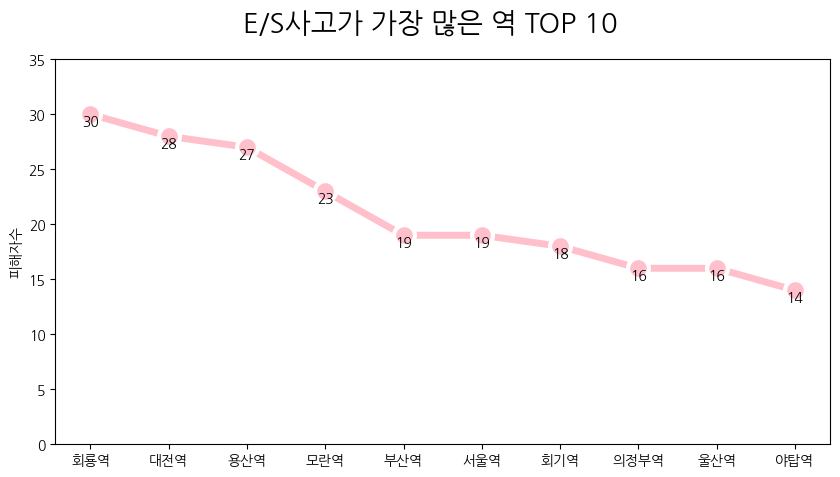

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,5)) # 기본 (1,1)
fig.suptitle('E/S사고가 가장 많은 역 TOP 10', size= 20)
ax1.set_ylabel('피해자수')
ax1.set_ylim(0,30)
ax1.set_yticks([0,5,10,15,20,25,30,35])
ax1.plot(df_es_st_an_top_10['역이름'], df_es_st_an_top_10['피해자수'], color='pink', marker='o', markersize=15, linewidth=5, markeredgecolor='w', markeredgewidth = 3)
for idx, val in enumerate(df_es_st_an_top_10['피해자수']):
   ax1.text(idx, val-1, val, ha='center')
# ax1.plot(df_es_st_an_top_10['역이름'], df_es_st_an_top_10['피해자수'], color='red')
# for idx,val in enumerate(df_es_st_an_top_10['피해자수']): # enumerate() - 인덱스와 원소를 반복해서 준다.
#   ax1.text(idx,val +80, val, ha='center') # text(가로,세로,텍스트) 함수로 x축을 인덱스 번호로 y축을 출생아 수의 값으로 하여 출생아 수의 값을 적는다. ha='정렬할 자리'


# ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
# ax2.set_ylabel('취업률')
# ax2.set_ylim(0,100)
# ax2.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
# # markeredgecolor = mec (마커 테두리 색깔) / markeredgewidth = mew (마커 테두리 두께) / markersize = ms (마커 크기) / linewidth = lw (라인 두께) / linestyle = ls (라인 스타일)
# ax2.plot(df_top10['학과(전공)'], df_top10['취업률'], color='#ffd100', marker='o', markersize=15, linewidth=5, markeredgecolor='w', markeredgewidth = 3)
# for idx, val in enumerate(df_top10['취업률']):
#   ax2.text(idx, val-1, val, ha='center')

In [ ]:
fig = px.bar(df_es_st_an_top_10, x = '역이름', y = '피해자수',
             barmode = 'group', #연도별로 보기위한 방법
             text_auto = True, # 각 레이블당 값이 출력
             title = 'E/S사고가 가장 많은 역 TOP 10')

fig.show()

In [ ]:
age_dataset = pd.read_csv('/content/drive/MyDrive/KDT /전철사고 나이 피해자.csv')
age_dataset

,연령,피해자수
0,10,0.033
1,20,0.026
2,30,0.108
3,40,0.073
4,50,0.089
5,60,0.154
6,70,0.205
7,80,0.221
8,90,0.097


In [ ]:
X = age_dataset.iloc[:, :-1].values # 독립변수
y = age_dataset.iloc[:,-1].values # 종속변수

In [ ]:
# 나이에 따른 피해확률 보기
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X, y)

LinearRegression()

In [ ]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred # 예측되는 데이터

array([0.03737778, 0.05597778, 0.07457778, 0.09317778, 0.11177778,
       0.13037778, 0.14897778, 0.16757778, 0.18617778])

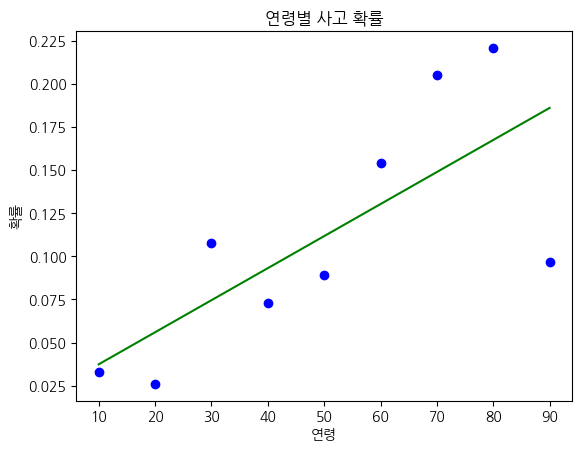

In [ ]:
# 단순 선형 회귀
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X, y_pred, color = 'green') # 선 그래프
plt.title('연령별 사고 확률') # 제목
plt.xlabel('연령') # X 축 이름
plt.ylabel('확률') # Y 축 이름
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법 
sr = SGDRegressor(max_iter = 1000, eta0 = 0.001, random_state = 0, verbose = 1)
sr.fit(X, y)

-- Epoch 1
Norm: 0.01, NNZs: 1, Bias: -0.000083, T: 9, Avg. loss: 0.006594
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1, Bias: -0.000228, T: 18, Avg. loss: 0.006398
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1, Bias: -0.000057, T: 27, Avg. loss: 0.145717
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 1, Bias: -0.000112, T: 36, Avg. loss: 0.001674
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1, Bias: -0.000080, T: 45, Avg. loss: 0.010631
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1, Bias: -0.000157, T: 54, Avg. loss: 0.001296
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 1, Bias: -0.000088, T: 63, Avg. loss: 0.005820
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 1, Bias: -0.000152, T: 72, Avg. loss: 0.000762
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.00, NNZs: 1, Bias: -0.000053, T: 81, Avg. loss: 0.036420
Total training time: 0.00 seconds.
Co

SGDRegressor(eta0=0.001, random_state=0, verbose=1)

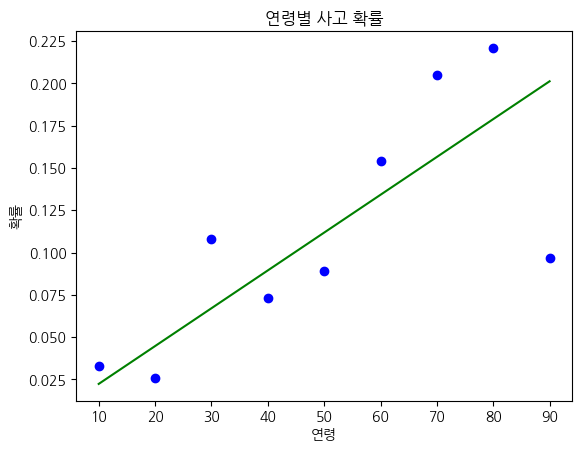

In [ ]:
# 경사하강법
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X, sr.predict(X), color = 'green') # 선 그래프
plt.title('연령별 사고 확률') # 제목
plt.xlabel('연령') # X 축 이름
plt.ylabel('확률') # Y 축 이름
plt.show()

In [ ]:
df

,지역번호,소속,선명,역이름,년,월,일,시,요일,역/열차,장소,세부장소,성별,음주,세부내용,부상상태,나이 범주
0,서울,서울고속열차승무사업소,경부선,서울역,2017,1,1,12,일,KTX,객실출입문,5호차,여,무,5호차 객실출입문에 끼어 손가락이 골절,경상,30대
1,서울,용산고속열차승무사업소,호남선,용산역,2017,1,2,16,월,무궁화,화장실,화장실 문,여,무,화장실문에 오른쪽 중지 손가락이 끼어 찰과상,경상,10대 미만
2,서울,대곡관리역,일산선,마두역,2017,1,5,15,목,역,E/S,2번출구 2번하행,여,무,뒤에 있던 이공신(77세) 고객이 앞으로 넘어지면서 부딪히는 충격으로 타박상,경상,80대 이상
3,서울,서울고속열차승무사업소,경부선,동대구역,2017,1,5,14,목,KTX,이동통로,15호차 화장실 앞,남,무,화장실 이용 후 객실로 이동 중 넘어져 왼쪽 무릎 아래 중간이 골절됨,경상,50대
4,서울,서울관리역,경부선,포항역,2017,1,2,16,월,역,화장실,화장실 내,남,무,"서울역 화장실에서 넘어져 이마 상처 생김, 467열차팀장 -> 포항역에 인계되어 접...",경상,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,수도권동부,망우관리역,경원선,회기역,2017,12,28,16,목,역,계단,경원선 남쪽,남,무,경원선 남쪽 계단을 이용하여 승강장으로 내려가던 중 하부에서 넘어져 구르면서 머리 ...,경상,70대
2976,수도권동부,의정부관리역,경원선,회룡역,2017,12,28,17,목,역,E/S,1호기,여,무,"ES 1호기 올라가다 넘어짐, 좌우 종아리 엉치 외상 발생",경상,50대
2977,수도권동부,수서관리역,분당선,야탑역,2017,12,28,20,목,역,E/S,4번출구 하행,남,무,"4번 출구 하행 에스컬레이터 4호기를 이용하여 역사로 들어오던 고객(김창호, 남, ...",경상,70대
2978,수도권동부,춘천관리역,경춘선,남춘천역,2017,12,29,15,금,역,E/S,외부ES,여,무,"외부 ES에서 올라 오던중 오순례(78세),김상옥(89세)이 넘어져 오순례씨가 오른...",경상,70대


In [ ]:
sta_df = df.loc[:, ['역이름','나이 범주','장소']]
sta_df

,역이름,나이 범주,장소
0,서울역,30대,객실출입문
1,용산역,10대 미만,화장실
2,마두역,80대 이상,E/S
3,동대구역,50대,이동통로
4,포항역,60대,화장실
...,...,...,...
2975,회기역,70대,계단
2976,회룡역,50대,E/S
2977,야탑역,70대,E/S
2978,남춘천역,70대,E/S


In [ ]:
sta_df['역이름'].value_counts()

sta_df_all = sta_df.groupby(by = ['역이름']).size().reset_index(name = '총 수')
sta_df_all

,역이름,총 수
0,간석역,1
1,평내호평,1
2,SR 수서역->동대구역,1
3,가능,1
4,가능역,4
...,...,...
385,화전역,3
386,화정역,16
387,회기역,37
388,회룡역,44


In [ ]:
sta_df_all = sta_df_all.sort_values('총 수',ascending=False)
sta_df_all

,역이름,총 수
174,서울역,98
274,용산역,94
202,수원역,68
82,대전역,66
150,부산역,52
...,...,...
215,신례원역,1
216,신용산역,1
219,신창역,1
222,신포역,1


In [ ]:
sta_df_all_dataset = sta_df_all.head(100)

In [ ]:
sta_df_all_dataset.dtypes

역이름    object
총 수     int64
dtype: object

In [ ]:
X = sta_df_all_dataset.iloc[:, :-1].values # 독립변수
y = sta_df_all_dataset.iloc[:,-1].values # 종속변수

In [ ]:
X

array([['서울역'],
       ['용산역'],
       ['수원역'],
       ['대전역'],
       ['부산역'],
       ['신도림역'],
       ['동대구역'],
       ['왕십리역'],
       ['영등포역'],
       ['회룡역'],
       ['청량리역'],
       ['천안역'],
       ['회기역'],
       ['의정부역'],
       ['모란역'],
       ['양평역'],
       ['구로역'],
       ['광주송정역'],
       ['광명역'],
       ['부평역'],
       ['서대전역'],
       ['부천역'],
       ['야탑역'],
       ['미금역'],
       ['개봉역'],
       ['금정역'],
       ['안양역'],
       ['울산역'],
       ['용문역'],
       ['상봉역'],
       ['역곡역'],
       ['노량진역'],
       ['대구역'],
       ['익산역'],
       ['산본역'],
       ['외대앞역'],
       ['주안역'],
       ['평택역'],
       ['광운대역'],
       ['죽전역'],
       ['목포역'],
       ['덕소역'],
       ['방학역'],
       ['범계역'],
       ['화정역'],
       ['동암역'],
       ['도봉산역'],
       ['천안아산역'],
       ['망우역'],
       ['남춘천역'],
       ['동인천역'],
       ['태평역'],
       ['월계역'],
       ['구미역'],
       ['구일역'],
       ['금천구청역'],
       ['양주역'],
       ['인덕원역'],
       ['동두천역'],
       ['대방역'],
       ['전주역'],
   

In [ ]:
y

array([98, 94, 68, 66, 52, 51, 50, 49, 45, 44, 43, 39, 37, 35, 32, 27, 26,
       26, 26, 25, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 20, 20, 20, 20,
       19, 19, 19, 19, 18, 18, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15,
       15, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9])

In [ ]:
sac_df_s

,역이름,나이 범주,장소
0,서울역,30대,객실출입문
1,용산역,10대 미만,화장실
2,마두역,80대 이상,E/S
3,동대구역,50대,이동통로
4,포항역,60대,화장실
...,...,...,...
2975,회기역,70대,계단
2976,회룡역,50대,E/S
2977,야탑역,70대,E/S
2978,남춘천역,70대,E/S


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X, y)

ValueError: ignored

In [ ]:
# 단순 선형 회귀
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X, y, color = 'green') # 선 그래프
plt.title('연령별 사고 확률') # 제목
plt.xlabel('연령') # X 축 이름
plt.ylabel('확률') # Y 축 이름
plt.show()